In [1]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\22789\Anaconda3\envs\pytorch_py\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'C:\Users\22789\Desktop\Income1.csv')

In [5]:
data.info()#读取数据的数据类型等信息
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


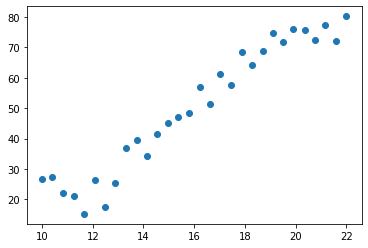

In [6]:
plt.scatter(data.Education,data.Income)

In [8]:
from torch import nn #导入神经网络工具箱

## 1.数据预处理

In [21]:
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

tensor([[26.6588],
        [27.3064],
        [22.1324],
        [21.1698],
        [15.1926],
        [26.3990],
        [17.4353],
        [25.5079],
        [36.8846],
        [39.6661],
        [34.3963],
        [41.4980],
        [44.9816],
        [47.0396],
        [48.2526],
        [57.0343],
        [51.4909],
        [61.3366],
        [57.5820],
        [68.5537],
        [64.3109],
        [68.9590],
        [74.6146],
        [71.8672],
        [76.0981],
        [75.7752],
        [72.4861],
        [77.3550],
        [72.1188],
        [80.2606]])

In [22]:
model = nn.Linear(1,1) #线性模型

In [23]:
loss_fn = nn.MSELoss() #损失函数

In [25]:
opt = torch.optim.SGD(model.parameters(),lr=0.0001)

In [38]:
for epoch in range(10000):
    for x,y in zip(X,Y):
        y_pred = model(x)
        loss = loss_fn(y,y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()

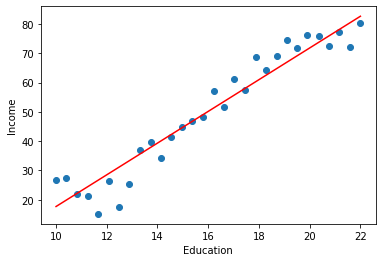

In [39]:
plt.scatter(data.Education,data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.plot(X.numpy(),model(X).data.numpy(),c='red')
plt.show()

In [50]:
import torch
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [42]:
# 1.读取数据
data = pd.read_csv(r'C:\Users\22789\Desktop\Income1.csv')

In [53]:
# 2.数据预处理
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [54]:
# 3.构建神经网络模型
from torch import nn
model = nn.Linear(1,1)
loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(),lr=0.001)
for i in range(1000):
    for x,y in zip(X,Y):
        y_pred = model(x)
        loss = loss_fn(y,y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()
    if i%50==0:
        print(f'第{i}轮训练结束,model_parameters:{model.bias}')

第0轮训练结束,model_parameters:Parameter containing:
tensor([-0.4447], requires_grad=True)
第50轮训练结束,model_parameters:Parameter containing:
tensor([-2.2706], requires_grad=True)
第100轮训练结束,model_parameters:Parameter containing:
tensor([-3.9935], requires_grad=True)
第150轮训练结束,model_parameters:Parameter containing:
tensor([-5.6192], requires_grad=True)
第200轮训练结束,model_parameters:Parameter containing:
tensor([-7.1531], requires_grad=True)
第250轮训练结束,model_parameters:Parameter containing:
tensor([-8.6004], requires_grad=True)
第300轮训练结束,model_parameters:Parameter containing:
tensor([-9.9660], requires_grad=True)
第350轮训练结束,model_parameters:Parameter containing:
tensor([-11.2546], requires_grad=True)
第400轮训练结束,model_parameters:Parameter containing:
tensor([-12.4704], requires_grad=True)
第450轮训练结束,model_parameters:Parameter containing:
tensor([-13.6176], requires_grad=True)
第500轮训练结束,model_parameters:Parameter containing:
tensor([-14.7000], requires_grad=True)
第550轮训练结束,model_parameters:Parameter conta

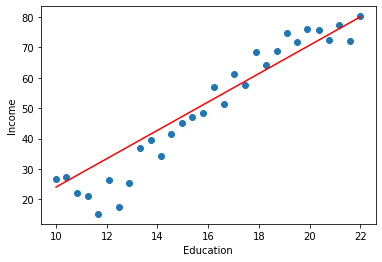

In [58]:
plt.scatter(X.numpy(),Y.numpy())
plt.xlabel('Education')
plt.ylabel('Income')
plt.plot(X.numpy(),model(X).data.numpy(),c='red')